In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [2]:
K=3
num=600
weight=[0.2,0.3,0.5]
mean=[-2,0,2]
covs=[1,1,1]#标准差
Theta=np.array([weight,mean,covs])

In [3]:
aa=np.random.normal(mean[0],covs[0],int(num*weight[0]))
bb=np.random.normal(mean[1],covs[1],int(num*weight[1]))
cc=np.random.normal(mean[2],covs[2],int(num*weight[2]))

In [4]:
data=np.hstack((aa,bb,cc))

In [5]:
def normal(x,theta):
    mu=theta[0]
    s=theta[1]#标准差
    result=(1/(np.sqrt(2*np.pi)*s))*np.exp(-1*(x-mu)*(x-mu)/(2*s**2))
    return result

In [6]:
def EM(X,theta):
    Ga=np.zeros((num,K))
    c=np.zeros(K)
    d=np.zeros(K)
    thetanext=np.zeros((3,K))
    
    for j in range(num):#响应度
        for k in range(K):
            c[k]=theta[0][k]*normal(X[j],theta[1:,k])
        Ga[j]=c/np.sum(c)

    for k in range(K):#更新参数
        d[k]=np.sum(Ga[:,k])
        thetanext[0,k]=d[k]/num
        thetanext[1,k]=np.dot(Ga[:,k],X[:])/d[k]
        thetanext[2,k]=np.sqrt(np.dot(Ga[:,k],(X[:]-theta[1,k])**2)/d[k])#标准差

    return thetanext

In [7]:
weight0=[0.3,0.4,0.3]
mean0=[-5,0,5]
covs0=[1,1,1]
theta0=np.array([weight0,mean0,covs0])

In [8]:
def iterate(X,n,T0):
    for i in range (n):
        T0=EM(X,T0)
    return T0

In [9]:
Theta

array([[ 0.2,  0.3,  0.5],
       [-2. ,  0. ,  2. ],
       [ 1. ,  1. ,  1. ]])

In [10]:
iterate(data,50,theta0)

array([[ 0.15195019,  0.57618599,  0.27186382],
       [-2.35962488,  0.46128799,  2.4840887 ],
       [ 0.88646533,  1.37617874,  0.77360986]])

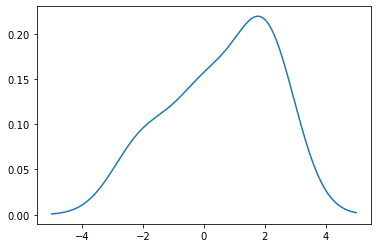

In [14]:
x = np.linspace(-5,5,2000) # 从0到1，等分50分
y = weight[0]*normal(x,Theta[1:,0])+weight[1]*normal(x,Theta[1:,1])+weight[2]*normal(x,Theta[1:,2])

plt.figure() # 定义一个图像窗口
plt.plot(x, y) # 绘制曲线 y
plt.show()

(array([ 5., 11., 30., 40., 63., 62., 45., 37.,  6.,  1.]),
 array([-0.69594347, -0.14046086,  0.41502175,  0.97050436,  1.52598697,
         2.08146958,  2.63695219,  3.1924348 ,  3.74791741,  4.30340002,
         4.85888263]),
 <BarContainer object of 10 artists>)

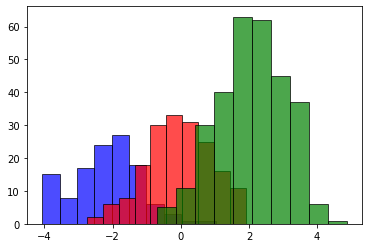

In [12]:
plt.hist(aa, bins=10,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.hist(bb, bins=10,  facecolor="red", edgecolor="black", alpha=0.7)
plt.hist(cc, bins=10, facecolor="green", edgecolor="black", alpha=0.7)